## Fake news classification - Modeling and Analysis

In [73]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
import textstat as ts
from numpy.random import seed
seed(100)


nltk.download('stopwords')


%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mehta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
data_path = "C:\\Users\\mehta\\Desktop\\deeplearning\\projects\\fakenews\\dataset"

true_news_data = pd.read_csv(data_path + "\\True.csv")
fake_news_data = pd.read_csv(data_path + "\\Fake.csv")

### Statistical & Visual data analysis

In [3]:
def avg_text_length(dataframe):
    rowCounts = [len(x.split()) for x in dataframe["text"].tolist()]
    avgCount = sum(rowCounts)//len(rowCounts)
    
    return avgCount

In [4]:
print("Avg. text length for true news: {}".format(avg_text_length(true_news_data)))
print("Avg. text length for fake news: {}".format(avg_text_length(fake_news_data)))

Avg. text length for true news: 385
Avg. text length for fake news: 423


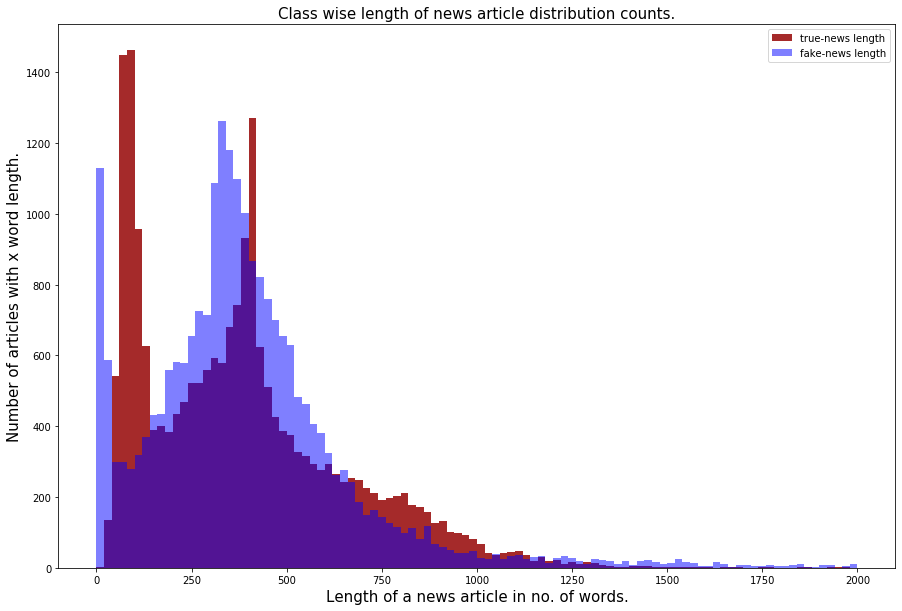

In [5]:
true_lengths = pd.Series([len(x.split()) for x in true_news_data["text"].tolist()])
fake_lengths = pd.Series([len(x.split()) for x in fake_news_data["text"].tolist()])

plt.figure(figsize = (15,10))
plt.hist(true_lengths, bins = 100, range = [0, 2000], color = "brown", label = "true-news length")
plt.hist(fake_lengths, bins = 100, range = [0, 2000], color = "blue", alpha = 0.5, label = "fake-news length")
plt.xlabel("Length of a news article in no. of words.", fontsize = 15)
plt.ylabel("Number of articles with x word length.", fontsize = 15)
plt.title("Class wise length of news article distribution counts.", fontsize = 15)
plt.legend()
plt.show()

### Key inferences from histogram:

1. There are more than 1100 <b>fake</b> articles with length = 0 words in our dataset.

2. Rarely, a <b>true</b> news article contains more than 1300 words.

3. There are many <b>true</b> news articles with less than 250 words while the number of <b>fake</b> news articles with less than 250 words are comparitively lesser.

In [6]:
def five_num_summary(dataframe):
    quartiles = np.percentile([len(x.split()) for x in dataframe["text"].tolist()], [0, 25, 50, 75, 100])
    
    return quartiles

In [7]:
true_summ = five_num_summary(true_news_data)

print("Text-length five number summary for true news data:")
for i in range(0, 101,25):
    print("{}'th %ile: {}".format(i, true_summ[i//25]))
    
    
print("\n")


fake_summ = five_num_summary(fake_news_data)

print("Text-length five number summary for fake news data:")
for i in range(0, 101,25):
    print("{}'th %ile: {}".format(i, fake_summ[i//25]))

Text-length five number summary for true news data:
0'th %ile: 0.0
25'th %ile: 148.0
50'th %ile: 359.0
75'th %ile: 525.0
100'th %ile: 5172.0


Text-length five number summary for fake news data:
0'th %ile: 0.0
25'th %ile: 240.0
50'th %ile: 363.0
75'th %ile: 506.0
100'th %ile: 8135.0


In [8]:
stopwords = nltk.corpus.stopwords.words("english")

def stopwords_frequency(dataframe):
    words_list = [x.split() for x in dataframe["text"].tolist()]
    frequencies = []
    for row in words_list:
        if(len(row)) > 0:
            row_frequency = len([w for w in row if w in stopwords])
            row_frequency = (row_frequency/len(row))*100

            frequencies.append(row_frequency)
    
    avg = sum(frequencies)/len(frequencies)
    
    return avg

In [9]:
true_frequencies = stopwords_frequency(true_news_data)
fake_frequencies = stopwords_frequency(fake_news_data)

In [10]:
print("Average stopwords frequency in true-news: {}".format(true_frequencies))
print("Average stopwords frequency in fake-news: {}".format(fake_frequencies))

Average stopwords frequency in true-news: 36.12374342655998
Average stopwords frequency in fake-news: 39.509912127071104


True news articles wordcloud.


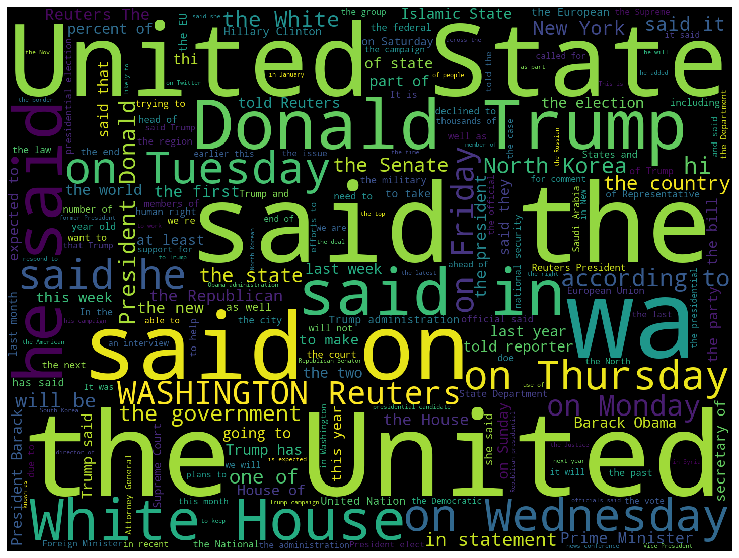

In [11]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(true_news_data["text"].astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

print("True news articles wordcloud.")

Fake news articles wordcloud.


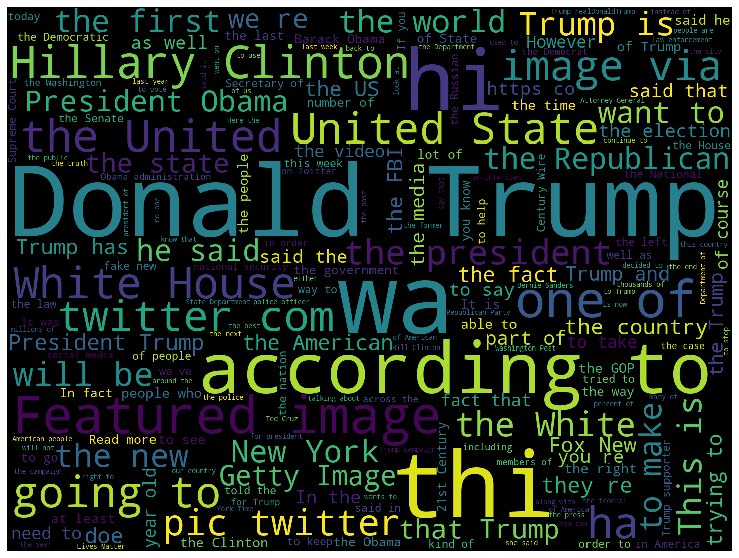

In [12]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(fake_news_data["text"].astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

print("Fake news articles wordcloud.")

In [13]:
true_news_readability = []
fake_news_readability = []

for sentence in true_news_data["text"].tolist():
    temp = ts.flesch_reading_ease(sentence)
    true_news_readability.append(temp)
    
for sentence in fake_news_data["text"].tolist():
    temp = ts.flesch_reading_ease(sentence)
    fake_news_readability.append(temp)
    
print("true: {} of length: {}".format(true_news_readability[:5], len(true_news_readability)))
print("fake: {} of length: {}".format(fake_news_readability[:5], len(fake_news_readability)))


true: [42.34, 32.97, 35.85, 46.1, 51.11] of length: 21417
fake: [34.56, 43.36, 50.5, 26.71, 59.98] of length: 23481


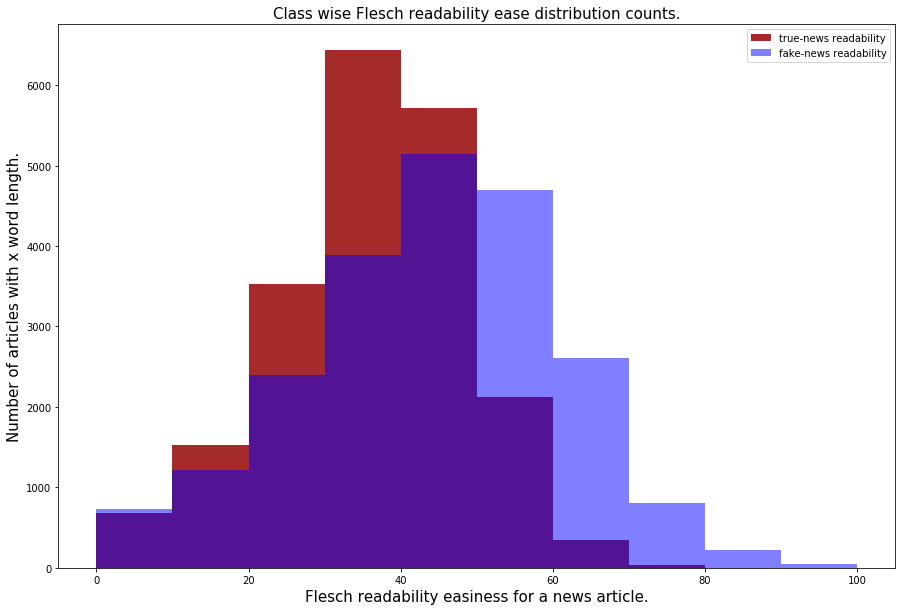

In [14]:
true_readability_df = pd.Series(true_news_readability)
fake_readability_df = pd.Series(fake_news_readability)

plt.figure(figsize = (15,10))
plt.hist(true_readability_df, bins = 10, range = [0, 100], color = "brown", label = "true-news readability")
plt.hist(fake_readability_df, bins = 10, range = [0, 100], color = "blue", alpha = 0.5, label = "fake-news readability")
plt.xlabel("Flesch readability easiness for a news article.", fontsize = 15)
plt.ylabel("Number of articles with x word length.", fontsize = 15)
plt.title("Class wise Flesch readability ease distribution counts.", fontsize = 15)
plt.legend()
plt.show()

In [15]:
fake_datewise_counts = fake_news_data.groupby('date').date.agg([('count', 'count')]).reset_index().sort_values(by = "count", ascending = False)

temp = fake_datewise_counts.head(50)


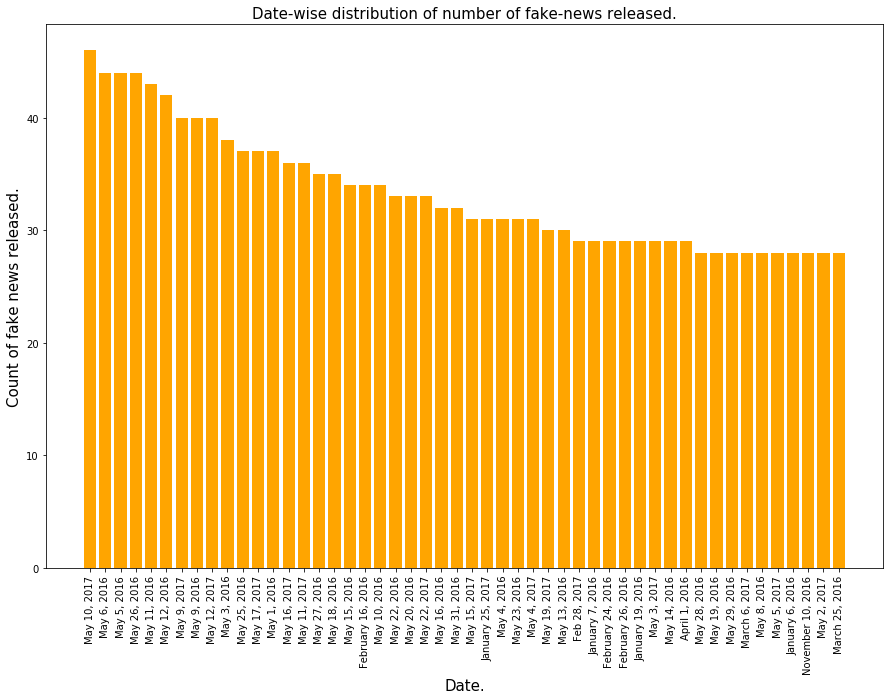

In [16]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
plt.bar(temp["date"], temp["count"], align = "center", color = "orange")
plt.xlabel("Date.", fontsize = 15)
plt.ylabel("Count of fake news released.", fontsize = 15)
plt.title("Date-wise distribution of number of fake-news released.", fontsize = 15)
plt.show()

In [75]:
true_news_data["label"] = "True"
fake_news_data["label"] = "Fake"

all_news_data = true_news_data.append(fake_news_data, ignore_index = True)

For our modeling purposes, we intend to classify whether a news article is True or Fake solely from its content, hence we exclude the other features such as date, subject as well as title.

In [76]:
del all_news_data['title']
del all_news_data['subject']
del all_news_data['date']

all_news_data.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,True
1,WASHINGTON (Reuters) - Transgender people will...,True
2,WASHINGTON (Reuters) - The special counsel inv...,True
3,WASHINGTON (Reuters) - Trump campaign adviser ...,True
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,True


### Modeling - Classical ML Approach - Multinomial Naive Bayes & Support Vector Machines

In [77]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re


# Preprocessing utility function definitions

def remove_punctuations(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text


def remove_nums(text):
    text = ''.join([i for i in text if not i.isdigit()])         
    return text


def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)


def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)


def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


stop_words = set(stopwords.words('english'))
def clean_stopwords(text):
    res = [w for w in text.split() if not w in stop_words]
    res_string = " ".join(str(x) for x in res)
    return res_string


In [78]:
all_news_data_processed = all_news_data.copy()

all_news_data_processed["text"] = all_news_data_processed["text"].apply(lambda x: remove_punctuations(x))
all_news_data_processed["text"] = all_news_data_processed["text"].apply(lambda x: remove_nums(x))
all_news_data_processed["text"] = all_news_data_processed["text"].apply(lambda x: remove_URL(x))
all_news_data_processed["text"] = all_news_data_processed["text"].apply(lambda x: remove_html(x))
all_news_data_processed["text"] = all_news_data_processed["text"].apply(lambda x: remove_emoji(x))
all_news_data_processed["text"] = all_news_data_processed["text"].apply(lambda x: clean_stopwords(x))

all_news_data_processed.head(10)

,text,label
0,WASHINGTON Reuters The head conservative Repub...,True
1,WASHINGTON Reuters Transgender people allowed ...,True
2,WASHINGTON Reuters The special counsel investi...,True
3,WASHINGTON Reuters Trump campaign adviser Geor...,True
4,SEATTLEWASHINGTON Reuters President Donald Tru...,True
5,WEST PALM BEACH FlaWASHINGTON Reuters The Whit...,True
6,WEST PALM BEACH Fla Reuters President Donald T...,True
7,The following statements posted verified Twitt...,True
8,The following statements posted verified Twitt...,True
9,WASHINGTON Reuters Alabama Secretary State Joh...,True


In [79]:
# Shuffling the rows.

all_news_data_processed = all_news_data_processed.sample(frac = 1).reset_index(drop=True).reset_index(drop = True)

In [22]:
# Train - validation - test split as 34898 - 5000 - 5000

train_X = all_news_data_processed.loc[:38000, "text"].values
train_Y = all_news_data_processed.loc[:38000, "label"].values
validation_X = all_news_data_processed.loc[38000:, "text"].values
validation_Y = all_news_data_processed.loc[38000:, "label"].values

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_X)
validation_vectors = vectorizer.transform(validation_X)

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import time

start = time.time()

mnb_classifier = MultinomialNB().fit(train_vectors, train_Y)
linear_svc_classifier = SVC(kernel = "linear").fit(train_vectors, train_Y)

end = time.time()

print("Trained 2 models in {} seconds.".format(end - start))

Trained 2 models in 1504.1402778625488 seconds.


In [25]:
from  sklearn.metrics  import accuracy_score

mnb_predicted = mnb_classifier.predict(validation_vectors)
linear_svc_predicted = linear_svc_classifier.predict(validation_vectors)


print("Validation accuracy - Multinomial Naive Bayes: {}".format(accuracy_score(validation_Y, mnb_predicted)))
print("Validation accuracy - Linear Support Vector Classifier: {}".format(accuracy_score(validation_Y, linear_svc_predicted)))

Validation accuracy - Multinomial Naive Bayes: 0.947010597880424
Validation accuracy - Linear Support Vector Classifier: 0.99500099980004


### Modeling - Deep learning approach - Word Embeddings and neural networks

In [80]:
all_news_data_processed['label'] = all_news_data_processed['label'].map( {'Fake':1, 'True':0} )


all_news_data_processed.head(10)

,text,label
0,BEIJING Reuters China Pakistan look extending ...,0
1,Watch Jill Stein explain working force recount...,1
2,Democratic Rep Debbie Wasserman Schultz seemin...,1
3,A Maricopa Country judge finally stood vile cr...,1
4,WASHINGTON Reuters President Barack Obama said...,0
5,If watch CNBC know John Harwood HUGE liberal p...,1
6,COLBERT LANGUAGE WARNING This late night host ...,1
7,VLADIVOSTOK Russia Reuters South Korean Presid...,0
8,What kind leader speaks like It obvious lots f...,1
9,WASHINGTON Reuters The outcome Alabama’s Dec U...,0


In [81]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 1000000
embedding_dim = 25
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 38000


temp = [x for x in all_news_data_processed["text"].tolist()]
train_sentences = temp[:training_size]
test_sentences = temp[training_size:]

temp2 = [x for x in all_news_data_processed["label"].tolist()]
train_labels = temp2[:training_size]
test_labels = temp2[training_size:]


tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)

word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [82]:
x = [x for x in all_news_data_processed["text"].tolist()]
x.sort(key = lambda s : len(s))

print(len(x[-1]))

39705


In [83]:
train_padded = np.array(train_padded)
train_labels = np.array(train_labels)

test_padded = np.array(test_padded)
test_labels = np.array(test_labels)

#### Regular dense neural network.

In [84]:
dnn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
dnn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [85]:
num_epochs = 10

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 1)

history = dnn_model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels), \
                        callbacks = [early_stopping_callback], verbose=1)

Epoch 1/10
1188/1188 [==============================] - 438s 369ms/step - loss: 0.1404 - accuracy: 0.9641 - val_loss: 0.0289 - val_accuracy: 0.9930
Epoch 2/10
1188/1188 [==============================] - 450s 379ms/step - loss: 0.0082 - accuracy: 0.9983 - val_loss: 0.0177 - val_accuracy: 0.9954
Epoch 3/10
1188/1188 [==============================] - 451s 380ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.0178 - val_accuracy: 0.9952
Epoch 4/10
1188/1188 [==============================] - 449s 378ms/step - loss: 5.7131e-04 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy: 0.9957
Epoch 5/10
1188/1188 [==============================] - 440s 370ms/step - loss: 3.5475e-04 - accuracy: 1.0000 - val_loss: 0.0201 - val_accuracy: 0.9955
Epoch 6/10
1188/1188 [==============================] - 455s 383ms/step - loss: 4.0397e-04 - accuracy: 0.9999 - val_loss: 0.0227 - val_accuracy: 0.9954
Epoch 7/10
1188/1188 [==============================] - 449s 378ms/step - loss: 2.8085e-04 - accurac

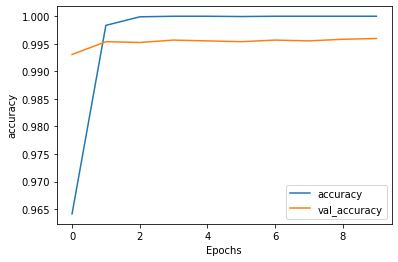

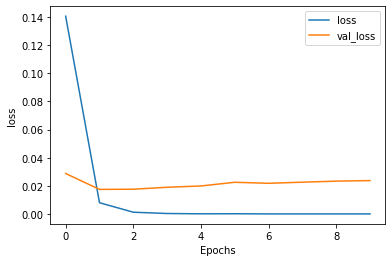

In [87]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#### Recurrent neural network - LSTM.

In [101]:
embedding_dim = 10

lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(12),
    tf.keras.layers.Dense(12, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 1/10
1188/1188 [==============================] - 192s 162ms/step - loss: 0.2161 - accuracy: 0.9285 - val_loss: 0.1252 - val_accuracy: 0.9714
Epoch 2/10
1188/1188 [==============================] - 203s 170ms/step - loss: 0.0928 - accuracy: 0.9779 - val_loss: 0.0509 - val_accuracy: 0.9884
Epoch 3/10
1188/1188 [==============================] - 200s 168ms/step - loss: 0.0244 - accuracy: 0.9948 - val_loss: 0.0394 - val_accuracy: 0.9909
Epoch 4/10
1188/1188 [==============================] - 197s 166ms/step - loss: 0.0286 - accuracy: 0.9939 - val_loss: 0.0419 - val_accuracy: 0.9899


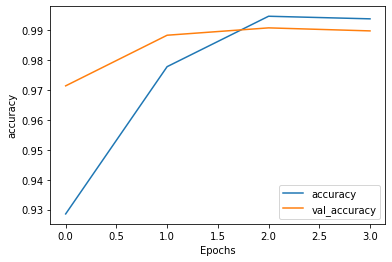

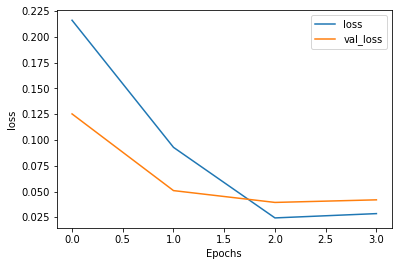

In [102]:
num_epochs = 10
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 1)

history = lstm_model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels), \
                         callbacks = [early_stopping_callback], verbose=1)

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

We notice that after training for epoch: 4, the early stopping criteria has been met where the loss is increased than the learning from the previous epoch, which shows that the model is overshooting to some extent and diverging from the minimum instead of converging.